In [1]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Checking out files: 100% (934/934), done.


In [ ]:
!unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/train_ende.zip"

In [2]:
import os
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
import cv2 as cv

In [3]:
# english_dev : 5063
# english_test : 5067
# english_train : 20240
# #--------------------
# german_dev : 5063
# german_test : 5067
# german_train : 20240
# #-------------------

In [8]:
y_h = lambda y : torch.zeros(3, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
class MSCTDDataset(Dataset):
    
    def __init__(self, transform=None, target_transform=None):
        # !git clone https://github.com/XL2248/MSCTD.git
        # !unzip "/content/drive/MyDrive/Colab_Notebooks/Deep_Learning/deepproject/train_ende.zip"
        english_text_patgh = "/content/MSCTD/MSCTD_data/ende/english_train.txt"
        german_text_patgh = "/content/MSCTD/MSCTD_data/ende/german_train.txt"
        sentiment_path = "/content/MSCTD/MSCTD_data/ende/sentiment_train.txt"
        self.image_path = "/content/train_ende/"

        with open(english_text_patgh) as f:
          english_text = [line.strip() for line in f.readlines()]
        print("english_text", len(english_text))
        self.englishtext = english_text

        with open(german_text_patgh) as f:
          german_text = [line.strip() for line in f.readlines()]
        self.germantext = german_text
        print("german_text", len(german_text))

        with open(sentiment_path) as f:
          sentiment = [line.strip() for line in f.readlines()]
        self.sentiment = sentiment
        print("sentiment", len(sentiment))
        
        Images = os.listdir(self.image_path)
        Images.sort(key = lambda x:  int(x.split(".")[0]))
        self.Images = Images
        # self.target = target
        # self.features = features
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.sentiment)

    def __getitem__(self, idx):

        img_path = os.path.join(self.image_path, self.Images[idx])

        img = cv.imread(img_path)
        sntmnt = self.sentiment[idx]
        grmn_txt = self.germantext[idx]
        englsh_txt = self.englishtext[idx]

        if self.target_transform:
            label = y_h(sntmnt)
        return img, englsh_txt, grmn_txt, sntmnt

In [9]:
train = MSCTDDataset(target_transform=False)

english_text 20240
german_text 20240
sentiment 20240


In [10]:
image, en_text, gr_text, sentiment = train[4452]

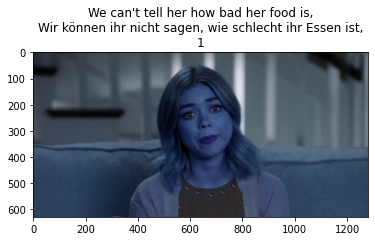

In [11]:
plt.title(en_text+"\n"+ gr_text+"\n" + sentiment)
plt.imshow(image)